In [9]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

# Предобработка

In [10]:
df = pd.read_csv("SpotifyFeatures.csv")
df['beats_number'] =[bpm * duration / 60000 for duration, bpm in zip(df.duration_ms, df.tempo)]
df.sample(3)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,beats_number
112784,Pop,Florida Georgia Line,Get Your Shine On,6s9ICeczYOfbHHIaSMq9jd,63,0.00286,0.497,222013,0.927,0.000001,C,0.4130,-4.520,Major,0.0371,96.991,4/4,0.607,358.887715
34925,Anime,fripSide,sky -crossroads version-,39d21yZNUCZTvguT5aXjCP,22,0.06830,0.573,323040,0.987,0.000003,B,0.1370,-3.870,Minor,0.1290,136.968,4/4,0.701,737.435712
5919,Alternative,A Perfect Circle,"So Long, And Thanks For All The Fish",4R5kwDx0ryIMiK2PKqbNVY,52,0.00144,0.500,266093,0.873,0.061300,D,0.0715,-3.869,Major,0.0369,130.048,4/4,0.325,576.747708


### Ниже представлен график зависимости "Танцевабельности" от темпа трека. По нему можно судить, что для танцев больше всего подходят треки с темпом между 100 из 150 бит в секунду.

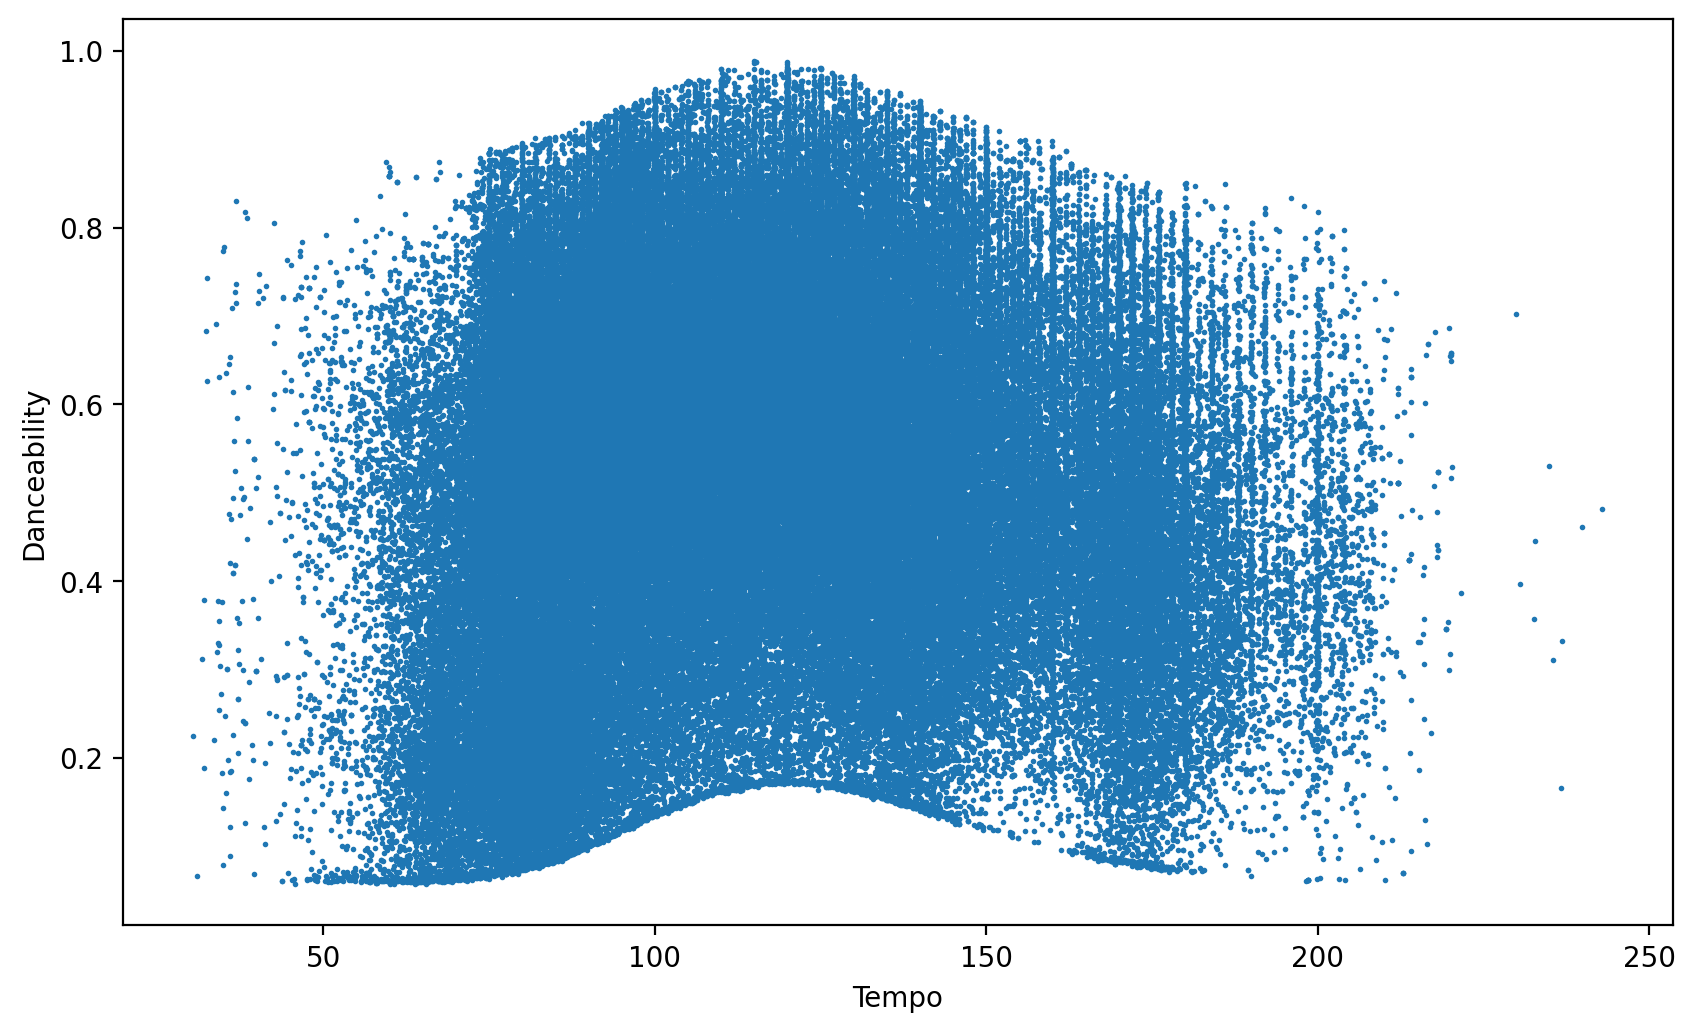

In [11]:
figure(figsize=(10, 6), dpi=200)
arr = sorted([[x,y] for x, y in zip(df.tempo, df.danceability)])
x = [x for [x,_] in arr]
y = [y for [_,y] in arr]

plt.xlabel('Tempo')
plt.ylabel('Danceability')
plt.scatter(x, y, s=1)

### Ниже представлен график популярности разных жанров

<BarContainer object of 26 artists>

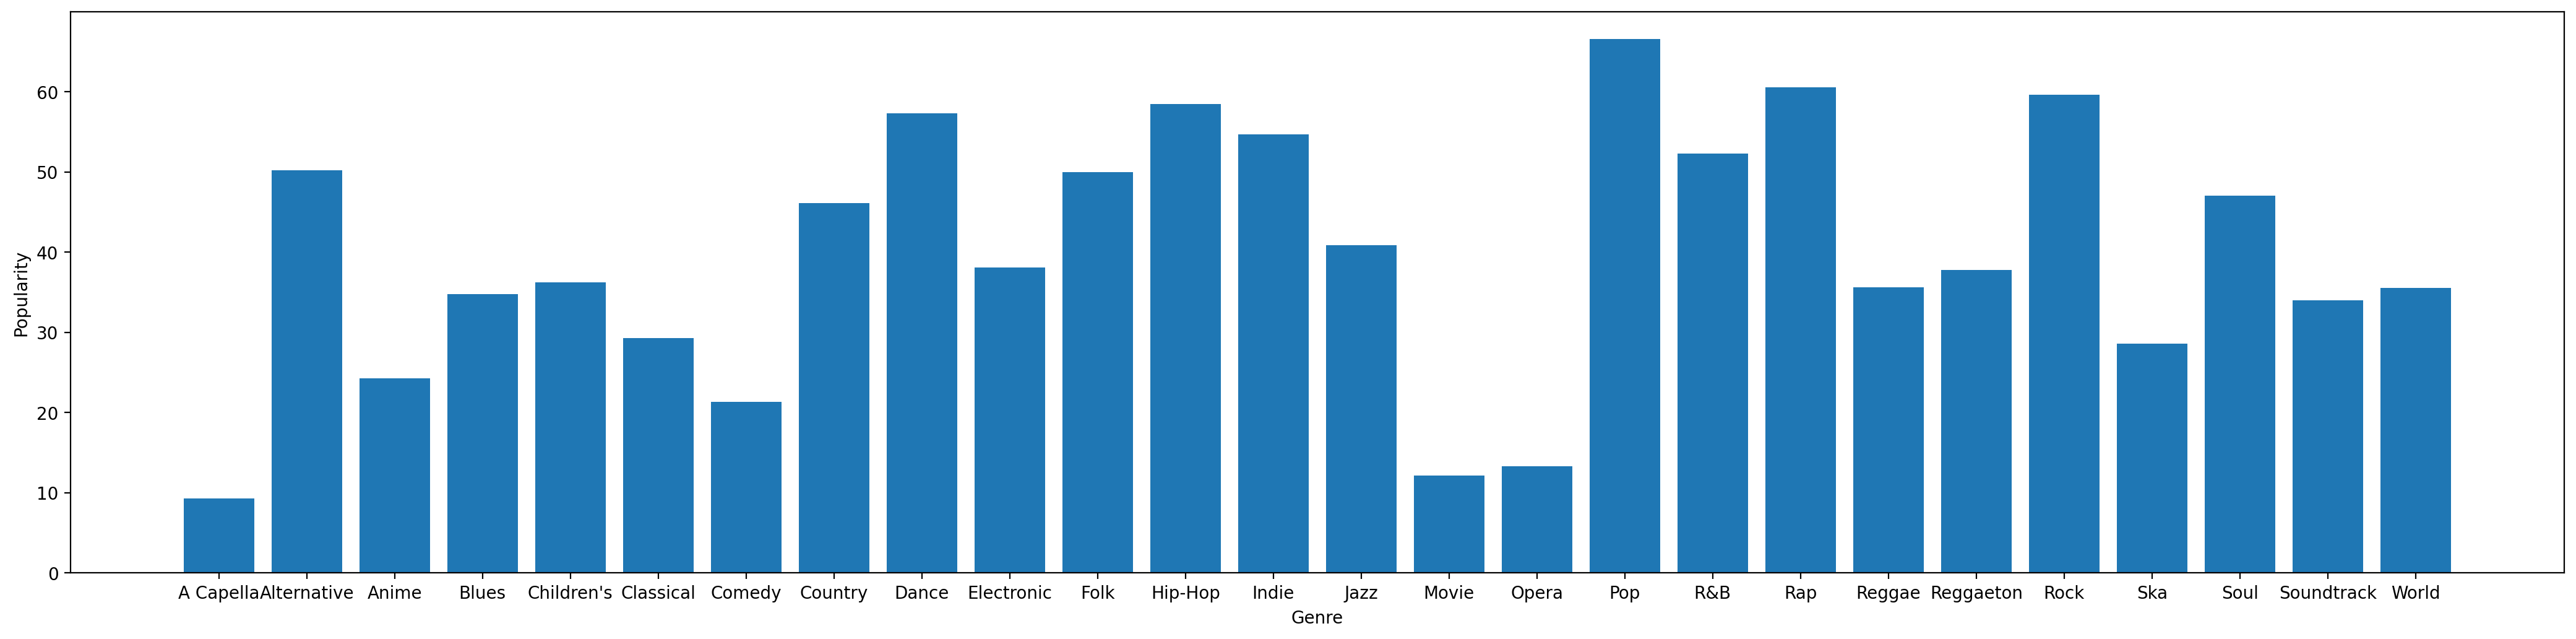

In [12]:
arr = sorted([[x, y] for x, y in zip(df.genre, df.popularity)])
for i, [x, y] in enumerate(arr):
    if x == "Children’s Music" or x == "Children's Music":
        arr[i] = ["Children's", y]
mx = 0
prev = arr[0][0]
lst={}
pop={}
for [x, y] in arr:
    if lst.__contains__(x):
        lst[x] += 1
        pop[x] += y
    else:
        lst[x] = 1
        pop[x] = y
for i, k in enumerate(lst):
    pop[k] /= lst[k]
names = [y for x, y in enumerate(pop)]
values = [pop[y] for x, y in enumerate(pop)]
figure(figsize=(26, 6), dpi=200)
plt.xlabel("Genre")
plt.ylabel("Popularity")
plt.bar(names, values)


### Ниже представлены диаграммы размаха и гистограммы трёх самых популярных жанров. На их основе можно более подробно сравнить популярность треков в данных жанрах.

{'whiskers': [<matplotlib.lines.Line2D at 0x25cb565b370>,
 'caps': [<matplotlib.lines.Line2D at 0x25cb565b9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25cb562fee0>,
 'medians': [<matplotlib.lines.Line2D at 0x25cb5649130>,
 'fliers': [<matplotlib.lines.Line2D at 0x25cb56494c0>,
 'means': []}

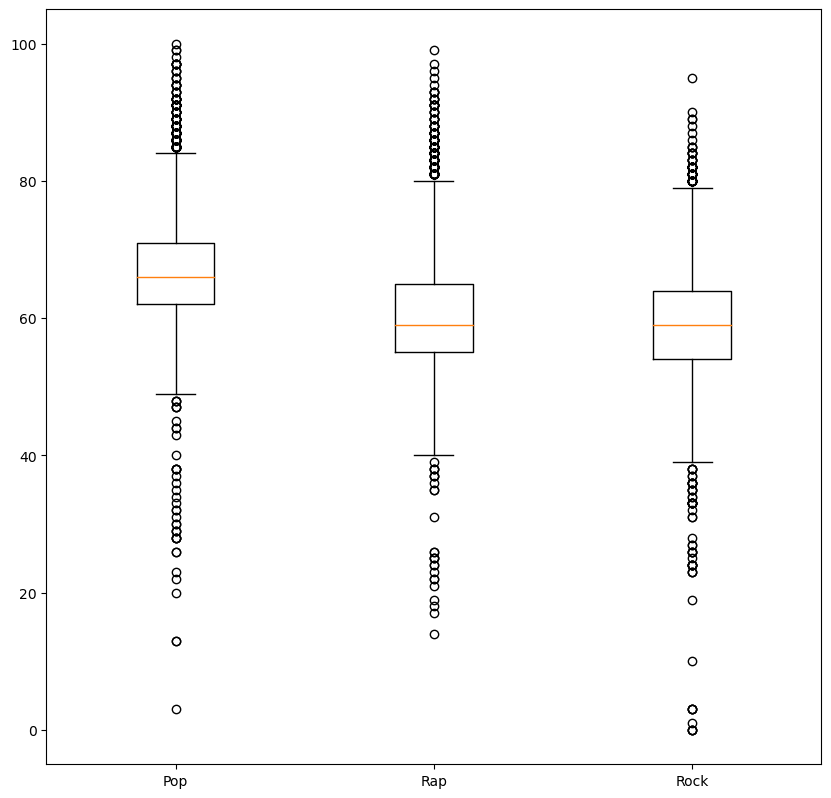

In [13]:
popPop = []
rapPop = []
rockPop = []
for [x, y] in arr:
    if x == "Rap":
        rapPop.append(y)
    elif x == "Pop":
        popPop.append(y)
    elif x == "Rock":
        rockPop.append(y)
    

figure(figsize=(10, 10), dpi=100)

plt.boxplot([popPop, rapPop, rockPop], labels=['Pop', 'Rap', 'Rock'])

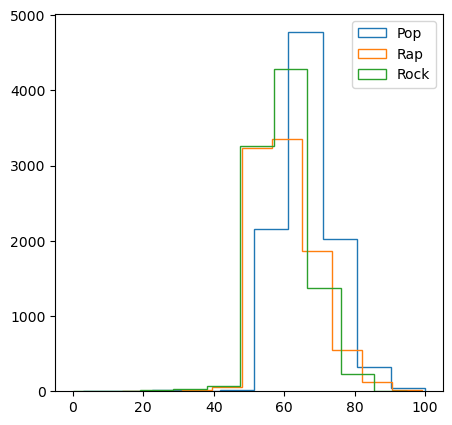

In [14]:
figure(figsize=(5,5), dpi=100)
for name, data in df.groupby('genre'):
    if (name == "Pop" or name == "Rock" or name == "Rap"):
        values = data['popularity'].values
        plt.hist(values, label=name, histtype='step')
plt.legend()
plt.show()

In [15]:
df.to_csv('SpotifyFeatures_updated.csv')

# Интерполяция кривой

### Квадратичная интерполяция

В случае квадратичной интерполяции, для каждых трех узловых точек строится уравнение параболы:
$$y=f(x)$$
$$(x_{i-1}, x_i, x_{i+1})$$
$$F(x) = a_0 + a_1x + a_2x^2,  x_{i-1} \leq x \leq x_{i+1}$$
$$a_0 = f(x_{i-1}) - a_1x_{i-1} - a_2x_{i-1}^2$$ 
$$a_1 = \frac{f(x_i) - f(x_{i-1})}{x_i - x_{i-1}} - a_2(x_i + x_{i+1})$$
$$a_2 = \frac{f(x_{i+1}) - f(x_{i-1})}{(x_{i+1} - x_{i-1})(x_{i+1} - x_i)} - \frac{f(x_i) - f(x_{i-1})}{(x_i - x_{i-1})(x_{i+1} - x_i)}$$

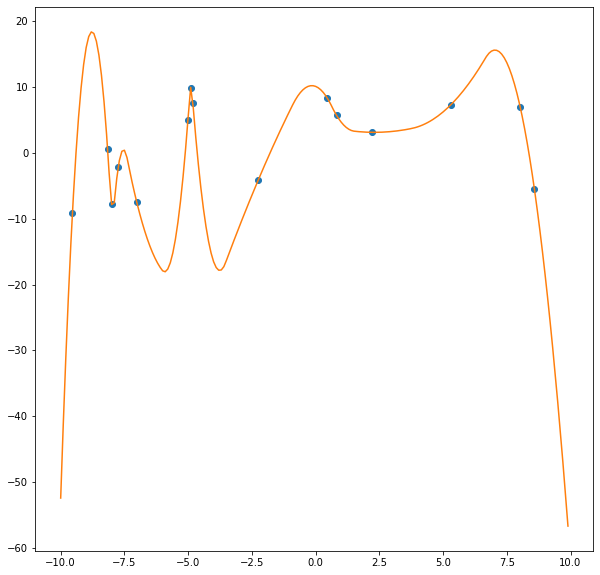

In [16]:
from scipy import interpolate
number_of_points = 15
x = np.random.uniform(low=-10, high=10, size=(number_of_points,))
y = np.random.uniform(low=-10, high=10, size=(number_of_points,))
f = interpolate.interp1d(x, y, kind='quadratic', fill_value='extrapolate')
xnew = np.arange(-10, 10, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
figure(figsize=(10,10))
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

### Многочлен Лагранжа

$$L_n(x) = \sum_{i=0}^{n}y_il_i(x)$$
$$l_i(x) = \prod_{j=1, j \neq i}^n \frac{x-x_j}{x_i-x_j} $$
$$l_i(x_j) =
\begin{cases}
   0 &i \neq j\\
   1 &i = j
 \end{cases}
 $$

In [17]:
def getPoint(x, y, point):
    sum = 0
    for i in range(len(x)):
        product = y[i]
        for j in range(len(x)):
            if j == i:
                continue
            product *= (point - x[j]) / (x[i] - x[j])
        sum += product
    return sum

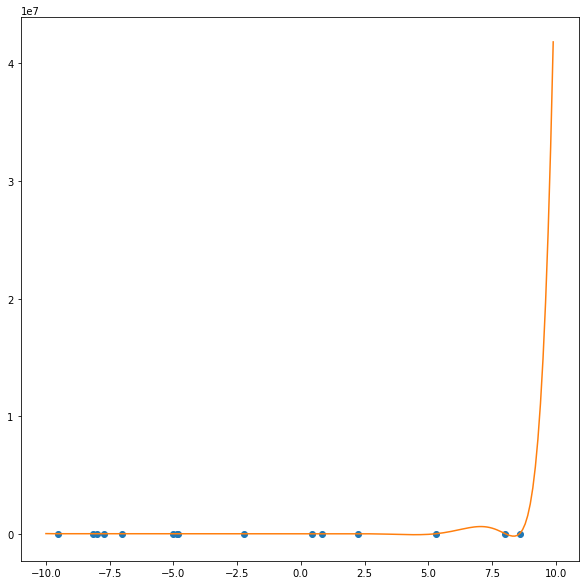

In [18]:
xnew = np.arange(-10, 10, 0.1)
ynew = getPoint(x, y, xnew)
figure(figsize=(10,10))
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

# Быстрая гистограмма

In [19]:
def fast_hist(array, bins):
    array.sort()
    step = (array[-1] - array[0]) / bins
    columns = [0] * bins
    
    edge = array[0]
    edges = []
    while edge <= array[-1]:
        edges.append(edge + step)
        edge += step
    
    index = 0
    for i in range(bins):
        while index < len(array) and array[index] <= edges[i]:
            columns[i] += 1
            index += 1
    
    for i, _ in enumerate(edges):
        edges[i] -= step / 2
    
    while len(edges) > bins:
        edges.pop()
        
    return columns, edges

6.88 ms ± 982 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


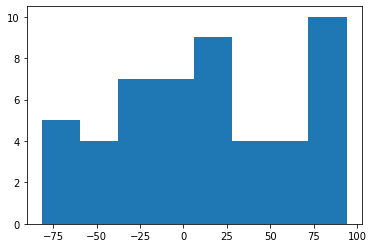

In [20]:
bins = 8
nums = np.random.uniform(low=-100, high=100, size=50)

%timeit plt.hist(nums, bins)

In [21]:
def fast_hist_draw(nums, bins):
    columns, labels = fast_hist(nums, bins)
    plt.bar(labels, columns, (nums[-1] - nums[0]) / bins)

3.8 ms ± 82.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


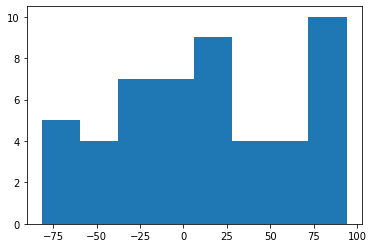

In [22]:
%timeit fast_hist_draw(nums, bins)